## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## How Do We Avoid Our Tree Overfitting Training Data?

We can see that below we have overfitted our training set and as a result we have high variance and our model does not generalize well.

In [44]:
df = sns.load_dataset('iris')
X = df.iloc[:,:2]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)

y_train_pred = tree_classifier.predict(X_train)
y_test_pred = tree_classifier.predict(X_test)

print(f"Training Accuracy: {round(accuracy_score(y_train, y_train_pred),2)} \nTesting Accuracy: {round(accuracy_score(y_test, y_test_pred),2)}")
      

Training Accuracy: 0.92 
Testing Accuracy: 0.7


## How Complex Is our Tree

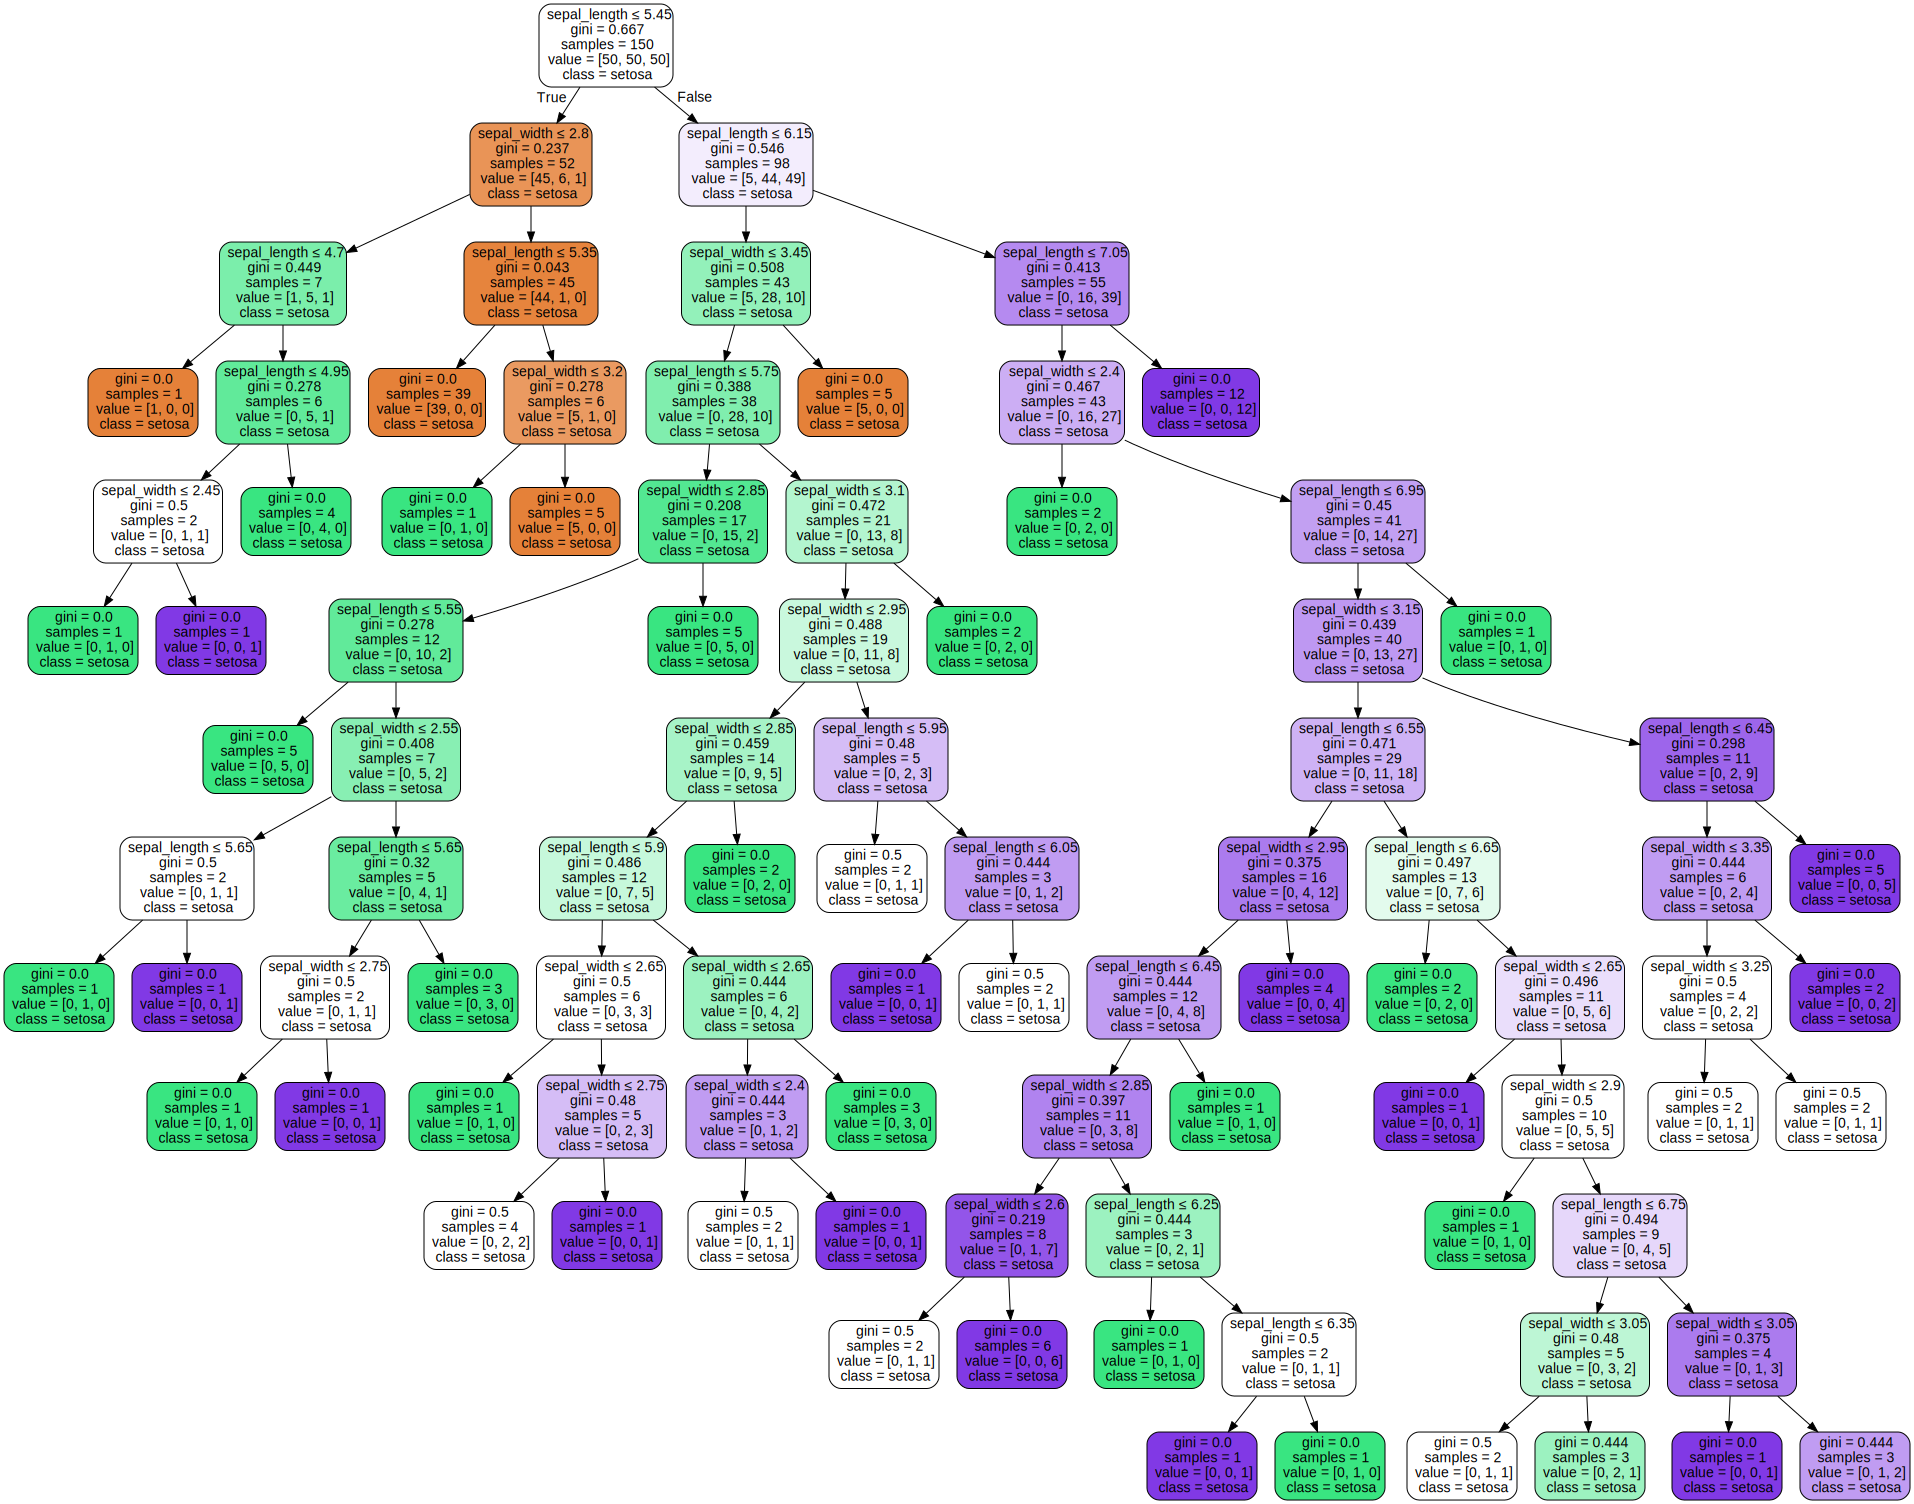

In [46]:
from sklearn import tree
import graphviz
tree_class = DecisionTreeClassifier()
tree_class = tree_class.fit(X,y)

dot_data = tree.export_graphviz(tree_class, out_file=None, 
                     feature_names=df.columns[:2],  
                     class_names=df.species,  
                     filled=True, rounded=True,  
                    special_characters=True)  
graphviz.Source(dot_data)  

## Cost Complexity Pruning

In [51]:
path = tree_classifier.cost_complexity_pruning_path(X_train,y_train)

# we can use these values of alpha to prune our decision tree
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00055556, 0.00138889, 0.00166667, 0.00277778,
       0.00277778, 0.00333333, 0.00380952, 0.00444444, 0.005     ,
       0.005     , 0.00515873, 0.00527047, 0.00529879, 0.00533374,
       0.0063923 , 0.00694444, 0.00776144, 0.00856684, 0.01230159,
       0.02425306, 0.04317793, 0.06257764, 0.2550457 ])

<AxesSubplot:>

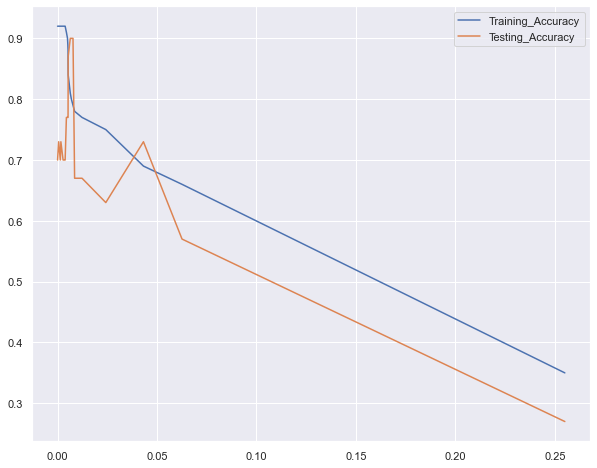

In [62]:
Training_Accuracy, Testing_Accuracy = [],[]
for i in alphas:
    clf = DecisionTreeClassifier(ccp_alpha = i)
    
    clf.fit(X_train,y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    Training_Accuracy.append(round(accuracy_score(y_train, y_train_pred),2))
    Testing_Accuracy.append(round(accuracy_score(y_test, y_test_pred),2))
    
sns.set()
plt.figure(figsize = [10,8])
sns.lineplot(y = Training_Accuracy, x = alphas, label = 'Training_Accuracy')
sns.lineplot(y = Testing_Accuracy, x = alphas, label = 'Testing_Accuracy')
    
    


We can see that between alpha=0.007 and 0.0075, we get the maximum test accuracy. Although our train accuracy has decreased to 0.8, our model is now more generalized and it will perform better on unseen data

In [71]:
tree_classifier = tree.DecisionTreeClassifier(ccp_alpha=0.007)
tree_classifier.fit(X_train,y_train)

y_train_pred = tree_classifier.predict(X_train)
y_test_pred = tree_classifier.predict(X_test)

print(f"Training Accuracy: {round(accuracy_score(y_train, y_train_pred),2)} \nTesting Accuracy: {round(accuracy_score(y_test, y_test_pred),2)}")
      

Training Accuracy: 0.8 
Testing Accuracy: 0.9


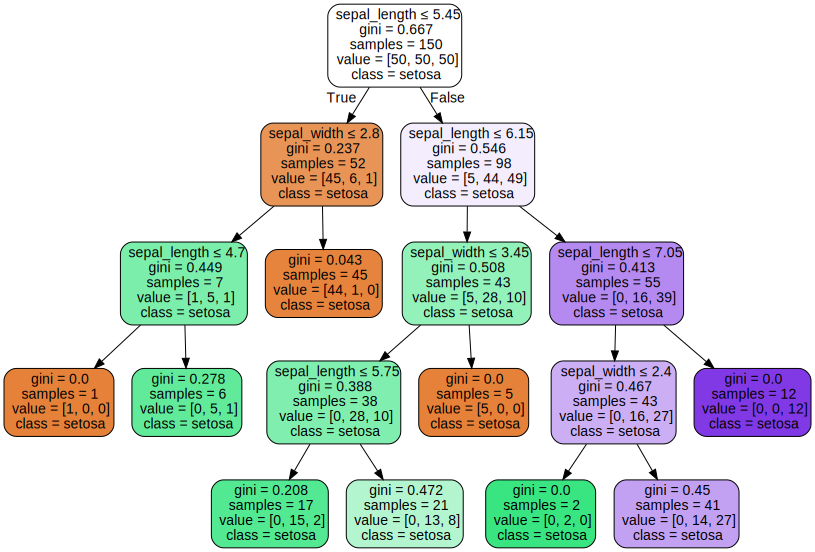

In [72]:
from sklearn import tree
import graphviz
tree_class = DecisionTreeClassifier(ccp_alpha=0.007)
tree_class = tree_class.fit(X,y)

dot_data = tree.export_graphviz(tree_class, out_file=None, 
                     feature_names=df.columns[:2],  
                     class_names=df.species,  
                     filled=True, rounded=True,  
                    special_characters=True)  
graphviz.Source(dot_data)